## Importing the libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


Loading the dataset

In [8]:
df = pd.read_csv("allphases.csv",index_col="Time")

### Summary of dataset

In [9]:
df.head()

,Two Wheeler1,Auto1,Car1,Bus1,LMV1,Total1,Two Wheeler2,Auto2,Car2,Bus2,LMV2,Total2,Two Wheeler3,Auto3,Car3,Bus3,LMV3,Total3
Time,,,,,,,,,,,,,,,,,,
7.00-7.15,780,55,288,24,2,1149,298,31,120,10,1,460,295,30,102,10,0,437
7.15-7.30,795,58,292,26,3,1174,290,28,112,12,2,444,288,28,112,10,2,440
7.30-7.45,802,64,304,26,1,1197,307,26,108,11,1,453,301,26,105,11,0,443
7.45-8.00,815,68,306,28,2,1219,294,25,114,12,1,446,284,25,114,12,0,435
8.00-8.15,798,60,280,30,1,1169,298,34,115,15,2,464,298,29,112,15,2,456


Since we are going to predict all types of vehicle we select only Total columns

In [10]:
model_df_total=df[df.columns[[5,11,17]]]

In [11]:
model_df_total.head()

,Total1,Total2,Total3
Time,,,
7.00-7.15,1149,460,437
7.15-7.30,1174,444,440
7.30-7.45,1197,453,443
7.45-8.00,1219,446,435
8.00-8.15,1169,464,456


5 Number Summary

In [12]:
model_df_total.describe()

,Total1,Total2,Total3
count,144.000000,144.000000,144.000000
mean,1131.416667,585.770833,422.187500
std,85.706239,124.361964,50.360931
min,992.000000,422.000000,349.000000
25%,1053.000000,459.750000,378.000000
50%,1120.500000,585.500000,400.000000
75%,1207.000000,703.000000,461.000000
max,1271.000000,768.000000,550.000000


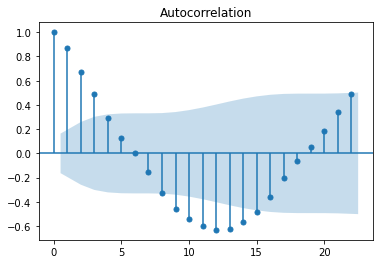

In [13]:
plot_acf(model_df_total["Total1"])
plt.show()

In [14]:
model_df=model_df_total[model_df_total.columns[[0,1]]]

In [15]:
model_df.head()

,Total1,Total2
Time,,
7.00-7.15,1149,460
7.15-7.30,1174,444
7.30-7.45,1197,453
7.45-8.00,1219,446
8.00-8.15,1169,464


In [16]:
model_df.shape

(144, 2)

In [17]:
train = model_df.iloc[:115]


In [18]:
test = model_df.iloc[115:]

In [19]:
train

,Total1,Total2
Time,,
7.00-7.15,1149,460
7.15-7.30,1174,444
7.30-7.45,1197,453
7.45-8.00,1219,446
8.00-8.15,1169,464
...,...,...
5.30-5.45,1034,657
5.45-6.00,1043,688
6.00-6.15,1029,686


In [20]:
test

,Total1,Total2
Time,,
6.45-7.00,1057,738
7.00-7.15,1089,717
7.15-7.30,1097,726
7.30-7.45,1082,725
7.45-8.00,1118,703
7.00-7.15,1206,426
7.15-7.30,1231,424
7.30-7.45,1199,441
7.45-8.00,1255,447


In [21]:

scaler=MinMaxScaler()
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.fit_transform(test)
scaled_train

array([[0.56272401, 0.10982659],
       [0.65232975, 0.06358382],
       [0.73476703, 0.08959538],
       [0.81362007, 0.06936416],
       [0.6344086 , 0.12138728],
       [0.74193548, 0.13294798],
       [0.88172043, 0.19075145],
       [0.98207885, 0.24566474],
       [1.        , 0.23410405],
       [0.96057348, 0.25722543],
       [0.52329749, 0.07514451],
       [0.07526882, 0.1734104 ],
       [0.        , 0.73988439],
       [0.06451613, 0.7716763 ],
       [0.15053763, 0.78612717],
       [0.21505376, 0.82080925],
       [0.11827957, 0.78901734],
       [0.21863799, 0.84104046],
       [0.22580645, 0.89884393],
       [0.23297491, 0.92485549],
       [0.34767025, 0.88439306],
       [0.36917563, 0.94797688],
       [0.18996416, 0.89884393],
       [0.33333333, 0.84393064],
       [0.61648746, 0.        ],
       [0.63799283, 0.01734104],
       [0.72401434, 0.04624277],
       [0.78136201, 0.06647399],
       [0.6344086 , 0.11271676],
       [0.69892473, 0.12138728],
       [0.

In [22]:
n_input = 1
n_features = 1
generator= TimeseriesGenerator(scaled_train[0],scaled_train[1],length=1,batch_size=1)
generator[0]

(array([[0.56272401]]), array([0.06358382]))

In [23]:
model = Sequential()
model.add(LSTM(100,activation='relu',input_shape=(1,1)))
model.add(Dense(1))
model.compile(optimizer="adam",loss="mse")

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(generator,epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.0030
Epoch 2/100
1/1 [==============================] - 0s 27ms/step - loss: 0.0026
Epoch 3/100
1/1 [==============================] - 0s 27ms/step - loss: 0.0022
Epoch 4/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0019
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 0.0016
Epoch 6/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0013
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 0.0010
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 8.3330e-04
Epoch 9/100
1/1 [==============================] - 0s 19ms/step - loss: 6.5215e-04
Epoch 10/100
1/1 [==============================] - 0s 19ms/step - loss: 4.9566e-04
Epoch 11/100
1/1 [==============================] - 0s 15ms/step - loss: 3.6325e-04
Epoch 12/100
1/1 [==============================] - 0s 14ms/step - loss: 2.5520e-04
Epoch 13/100
1/1 [=============

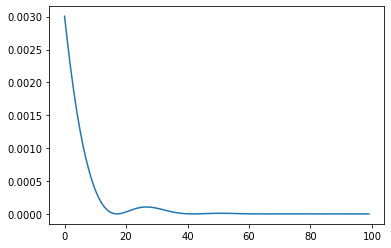

In [26]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

### The given junction's traffic is 1158 vehicles and the next junction's numbe of vehicle count will be 443 vehicles

In [27]:
scaler.inverse_transform([[0.56272401,0.06327115]])

array([[1158.98924631,  443.8671411 ]])

In [28]:
pred = model.predict([[0.56272401]])
pred

array([[0.06343221]], dtype=float32)

In [29]:
model.save("trafficpredictor")

2022-02-27 23:39:47.194 Assets written to: trafficpredictor\assets
2022-02-27 23:39:47.293 <keras.layers.recurrent.LSTMCell object at 0x000001DC183443D0> has the same name 'LSTMCell' as a built-in Keras object. Consider renaming <class 'keras.layers.recurrent.LSTMCell'> to avoid naming conflicts when loading with `tf.keras.models.load_model`. If renaming is not possible, pass the object in the `custom_objects` parameter of the load function.
